<a href="https://colab.research.google.com/github/Sankalpa0011/CNN-Capuchin-Audio-Classification/blob/main/CNN_Capuchin_Audio_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import And Install Dependencies**

### **Install Dependencies**

In [1]:
!pip install tensorflow tensorflow-io matplotlib kaggle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 MB 12.1 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **Load Dependencies**

In [3]:
import os
import json
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio

In [4]:
kaggle_credentails = json.load(open("/content/drive/MyDrive/DL Projects/kaggle (2).json"))

# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [5]:
# dataset api
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

Dataset URL: https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing
License(s): CC-BY-NC-SA-4.0
100% 603M/604M [00:11<00:00, 65.6MB/s]
100% 604M/604M [00:11<00:00, 57.1MB/s]


In [6]:
from zipfile import ZipFile
import os

# Path to the zip file
dataset = '/content/z-by-hp-unlocked-challenge-3-signal-processing.zip'

# Define the new folder path
new_folder = '/content/data'

# Create the new folder if it doesn't exist
os.makedirs(new_folder, exist_ok=True)

# Extract the zip file into the new folder
with ZipFile(dataset, 'r') as zip:
    zip.extractall(new_folder)
    print('The dataset is extracted into', new_folder)

The dataset is extracted into /content/data


# **Build Data Loading Function**

### **Define Paths To Files**

In [7]:
CAPUCHIN_FILE = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav')

In [8]:
CAPUCHIN_FILE

'data/Parsed_Capuchinbird_Clips/XC3776-3.wav'

In [9]:
NOT_CAPUCHIN_FILE

'data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-0.wav'

### **Build Dataloading Function**

In [10]:
def load_wav_16k_mono(filename):
    # Load encoded wav file
    file_contents = tf.io.read_file(filename)
    # Decode wav (tensors by channels)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    # Removes trailing axis
    wav = tf.squeeze(wav, axis=-1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Goes from 44100Hz to 16000hz - amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    return wav

In [11]:
file_contents = tf.io.read_file(CAPUCHIN_FILE)

In [12]:
file_contents

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF\xbc\t\x04\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x01\x00D\xac\x00\x00\x88X\x01\x00\x02\x00\x10\x00data\x98\t\x04\x00\xc5\xf1(\xfb\x7f\x07F\x13|\x1c\xa3$\x07.R8\x03A\xbaF\xb6J\xb4NQR\x92S\x95Q\xa1M/I\xb3CJ;\x88/\xa2"X\x17\x12\x0e\xce\x04\xdd\xf9\x07\xeei\xe3\xc3\xda\xa5\xd2\xae\xc9\xc4\xc0P\xbaB\xb7\xb5\xb5-\xb3\xaa\xaf\xad\xad\x00\xafd\xb22\xb5\xeb\xb6\xf5\xb9m\xc0\x1e\xc9\xc6\xd0-\xd6\xba\xdbO\xe4[\xefG\xf9\xd2\xff\xc3\x04\x87\x0b\xec\x14m\x1e\xc6%\xc4+\xb22\xa3:\xd7@\x17C\x86B8BoC[D\xc5B\xda>\x9e:\x117\xeb2`,_#\x93\x19\x82\x10X\x08M\x00\xb2\xf7j\xee\t\xe5\xc1\xdc\xbc\xd6\xf3\xd2\xeb\xcfV\xcc\x1c\xc9\xc5\xc8b\xcc\x95\xd1\xe6\xd4\xe4\xd5\xda\xd7\xb2\xdd\x13\xe6\xf3\xec\xc8\xf0\x99\xf4\x00\xfc@\x06\xed\x0eX\x13\x94\x154\x19:\x1e!!\xcb\x1fj\x1cu\x1a\xdd\x19A\x17\xd6\x100\t\t\x04f\x01\xd3\xfd_\xf7\x84\xf0\xf7\xec\xb5\xec\x16\xec\xc1\xe8\xd8\xe4.\xe4V\xe72\xeb<\xed\xad\xeeb\xf2\xc1\xf8E\xff\x00\x04\x04\x08t\r!\x14\x83\x19\xfe\x1b\xd6\x1cJ\x1e\x

In [13]:
wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)

In [14]:
wav

<tf.Tensor: shape=(132300, 1), dtype=float32, numpy=
array([[-0.11117554],
       [-0.0378418 ],
       [ 0.05856323],
       ...,
       [-0.01077271],
       [-0.03436279],
       [-0.04879761]], dtype=float32)>

In [15]:
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=44100>

In [16]:
len(wav)

132300

In [17]:
wav = tfio.audio.resample(wav, rate_in=44100, rate_out=16000)

In [18]:
len(wav)

48000

### **Plot Wave**

In [19]:
wave = load_wav_16k_mono(CAPUCHIN_FILE)
nwave = load_wav_16k_mono(NOT_CAPUCHIN_FILE)

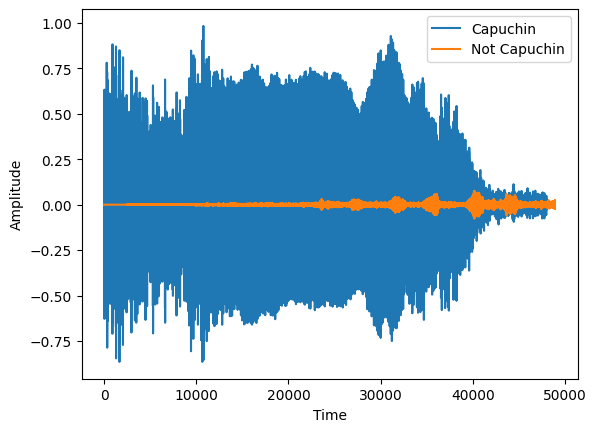

In [20]:
plt.plot(wave, label="Capuchin")
plt.plot(nwave, label="Not Capuchin")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

# **Create Tensorflow Dataset**

### **Define Paths To Positive And Negative Data**

In [21]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

In [22]:
POS

'data/Parsed_Capuchinbird_Clips'

### **Create Tensorflow Dataset**

In [23]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [24]:
pos.as_numpy_iterator().next()

b'data/Parsed_Capuchinbird_Clips/XC433953-2.wav'

In [25]:
print(len(pos) , len(neg))

217 593


### **Add Labels And Combine Positive And Negative Samples**

In [26]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

In [27]:
positives.as_numpy_iterator().next()

(b'data/Parsed_Capuchinbird_Clips/XC456236-2.wav', 1.0)

In [28]:
negatives.as_numpy_iterator().next()

(b'data/Parsed_Not_Capuchinbird_Clips/afternoon-birds-song-in-forest-18.wav',
 0.0)

In [29]:
data.as_numpy_iterator().next()

(b'data/Parsed_Capuchinbird_Clips/XC387509-0.wav', 1.0)

In [30]:
data.shuffle(1000).as_numpy_iterator().next()

(b'data/Parsed_Not_Capuchinbird_Clips/sparrow-sound-effect-5.wav', 0.0)

# **Ditermine Average Length Of A Capuchin Call**

### **Calculate Wave Cycle Length**

In [31]:
lengths = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

In [32]:
os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips'))

['XC395129-1.wav',
 'XC22397-0.wav',
 'XC16803-1.wav',
 'XC216012-6.wav',
 'XC27882-3.wav',
 'XC114132-1.wav',
 'XC178168-0.wav',
 'XC433953-6.wav',
 'XC9221-1.wav',
 'XC216012-16.wav',
 'XC9221-0.wav',
 'XC3776-1.wav',
 'XC433953-8.wav',
 'XC27881-3.wav',
 'XC216010-5.wav',
 'XC227469-3.wav',
 'XC216012-10.wav',
 'XC27881-1.wav',
 'XC178167-2.wav',
 'XC526106-3.wav',
 'XC520626-2.wav',
 'XC387509-5.wav',
 'XC27882-5.wav',
 'XC65195-0.wav',
 'XC44070-1.wav',
 'XC114131-0.wav',
 'XC227469-0.wav',
 'XC395129-5.wav',
 'XC44070-2.wav',
 'XC65196-2.wav',
 'XC520626-0.wav',
 'XC46241-4.wav',
 'XC216012-5.wav',
 'XC433953-4.wav',
 'XC178167-3.wav',
 'XC3776-2.wav',
 'XC456236-3.wav',
 'XC3776-4.wav',
 'XC22397-6.wav',
 'XC114132-6.wav',
 'XC216012-8.wav',
 'XC600460-4.wav',
 'XC216012-13.wav',
 'XC9221-2.wav',
 'XC600460-0.wav',
 'XC98557-0.wav',
 'XC216010-6.wav',
 'XC227471-3.wav',
 'XC114132-5.wav',
 'XC216012-15.wav',
 'XC513083-2.wav',
 'XC395129-0.wav',
 'XC46241-5.wav',
 'XC178168-5.wa

In [33]:
lengths # hz

[32000,
 64000,
 40000,
 48000,
 48000,
 64000,
 48000,
 48000,
 64000,
 56000,
 64000,
 48000,
 32000,
 40000,
 48000,
 56000,
 64000,
 56000,
 56000,
 48000,
 48000,
 56000,
 56000,
 56000,
 56000,
 40000,
 48000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 64000,
 56000,
 56000,
 48000,
 64000,
 56000,
 56000,
 48000,
 56000,
 40000,
 56000,
 56000,
 64000,
 48000,
 56000,
 48000,
 48000,
 64000,
 56000,
 64000,
 64000,
 72000,
 48000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 56000,
 32000,
 56000,
 56000,
 40000,
 48000,
 64000,
 40000,
 56000,
 48000,
 56000,
 56000,
 48000,
 56000,
 48000,
 64000,
 64000,
 48000,
 64000,
 56000,
 56000,
 56000,
 56000,
 56000,
 48000,
 64000,
 48000,
 56000,
 40000,
 56000,
 56000,
 56000,
 48000,
 55999,
 48000,
 56000,
 56000,
 56000,
 56000,
 48000,
 56000,
 48000,
 48000,
 40000,
 64000,
 48000,
 40000,
 56000,
 72000,
 64000,
 64000,
 64000,
 56000,
 48000,
 56000,
 64000,
 48000,
 56000,
 64000,
 55999,
 64000,
 48000,
 40000,


### **Calculate Mean, Min, Max**

In [34]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [35]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [36]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [37]:
54156/16000	# Average secs for capuchin birs sound

3.38475

In [38]:
32000/16000	# Minimum secs for not capuchin birs sound

2.0

In [39]:
80000/16000	# Maximum secs for not capuchin birs sound

5.0

# **Build Preprocessing Function To Convert To Spectrogram**

### **Build Preprocessing Function**

In [40]:
def preprocess(file_path, label):
  wav = load_wav_16k_mono(file_path)
  wav = wav[:48000]
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
  wav = tf.concat([zero_padding, wav], 0)

  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)  # Short term fourier transform
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)

  return spectrogram, label

In [41]:
# Example on this function
wav = load_wav_16k_mono(CAPUCHIN_FILE)
wav = wav[:48000]
zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
wav = tf.concat([zero_padding, wav], 0)

In [42]:
wav

<tf.Tensor: shape=(48000,), dtype=float32, numpy=
array([ 8.9910554e-07, -2.7947258e-06,  7.0741157e-06, ...,
       -1.0823049e-02, -3.5766482e-03,  1.5143131e-02], dtype=float32)>

In [43]:
spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)  # Short term fourier transform
spectrogram

<tf.Tensor: shape=(1491, 257), dtype=complex64, numpy=
array([[ 7.2591394e-02+0.0000000e+00j,  6.7992195e-02-2.0559762e-02j,
         5.4970033e-02-4.2972922e-02j, ...,
        -1.3107248e-04+4.5731105e-04j,  2.2325665e-04+1.0497123e-04j,
         7.3611736e-06+0.0000000e+00j],
       [-3.5664439e-03+0.0000000e+00j, -9.6119894e-04-2.4884965e-04j,
        -4.2072926e-03-3.8318178e-03j, ...,
         2.8380915e-04+2.6447803e-04j,  1.1922186e-04-1.5517350e-04j,
        -3.3080578e-05+0.0000000e+00j],
       [-3.7607998e-03+0.0000000e+00j,  2.3713058e-03+1.3893442e-03j,
         4.9793569e-04-3.5142400e-03j, ...,
         3.0914476e-04-9.1413385e-05j, -1.4053122e-04-1.7673807e-04j,
        -4.4688582e-05+0.0000000e+00j],
       ...,
       [ 5.8630481e-03+0.0000000e+00j,  7.2082115e-04-8.8769738e-03j,
        -1.4671192e-02+3.1971398e-03j, ...,
        -5.5813976e-04+5.6765112e-04j,  3.2898056e-04+4.9715396e-05j,
        -1.2891740e-04+0.0000000e+00j],
       [ 3.7055314e-03+0.0000000e+00j

In [44]:
spectrogram = tf.abs(spectrogram)
spectrogram

<tf.Tensor: shape=(1491, 257), dtype=float32, numpy=
array([[7.2591394e-02, 7.1032688e-02, 6.9773756e-02, ..., 4.7572408e-04,
        2.4670325e-04, 7.3611736e-06],
       [3.5664439e-03, 9.9288952e-04, 5.6907064e-03, ..., 3.8793849e-04,
        1.9568513e-04, 3.3080578e-05],
       [3.7607998e-03, 2.7483392e-03, 3.5493411e-03, ..., 3.2237693e-04,
        2.2579941e-04, 4.4688582e-05],
       ...,
       [5.8630481e-03, 8.9061912e-03, 1.5015511e-02, ..., 7.9608278e-04,
        3.3271583e-04, 1.2891740e-04],
       [3.7055314e-03, 6.7680362e-03, 1.3490734e-02, ..., 7.4700371e-04,
        4.1957328e-04, 2.7258694e-04],
       [6.5301359e-04, 3.5431688e-03, 1.0943846e-02, ..., 8.1208354e-04,
        4.3577494e-04, 1.9696355e-04]], dtype=float32)>

In [45]:
spectrogram = tf.expand_dims(spectrogram, axis=2)   # This is like grayscale image becouse the shape of this, channels=1
spectrogram

<tf.Tensor: shape=(1491, 257, 1), dtype=float32, numpy=
array([[[7.2591394e-02],
        [7.1032688e-02],
        [6.9773756e-02],
        ...,
        [4.7572408e-04],
        [2.4670325e-04],
        [7.3611736e-06]],

       [[3.5664439e-03],
        [9.9288952e-04],
        [5.6907064e-03],
        ...,
        [3.8793849e-04],
        [1.9568513e-04],
        [3.3080578e-05]],

       [[3.7607998e-03],
        [2.7483392e-03],
        [3.5493411e-03],
        ...,
        [3.2237693e-04],
        [2.2579941e-04],
        [4.4688582e-05]],

       ...,

       [[5.8630481e-03],
        [8.9061912e-03],
        [1.5015511e-02],
        ...,
        [7.9608278e-04],
        [3.3271583e-04],
        [1.2891740e-04]],

       [[3.7055314e-03],
        [6.7680362e-03],
        [1.3490734e-02],
        ...,
        [7.4700371e-04],
        [4.1957328e-04],
        [2.7258694e-04]],

       [[6.5301359e-04],
        [3.5431688e-03],
        [1.0943846e-02],
        ...,
        [8.1208354

### **Test Out The Function And Visualize The Spectrogram**

In [46]:
# Positive
file_path, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [47]:
spectrogram, label = preprocess(file_path, label) # Before run this need to rerun the preprocess function

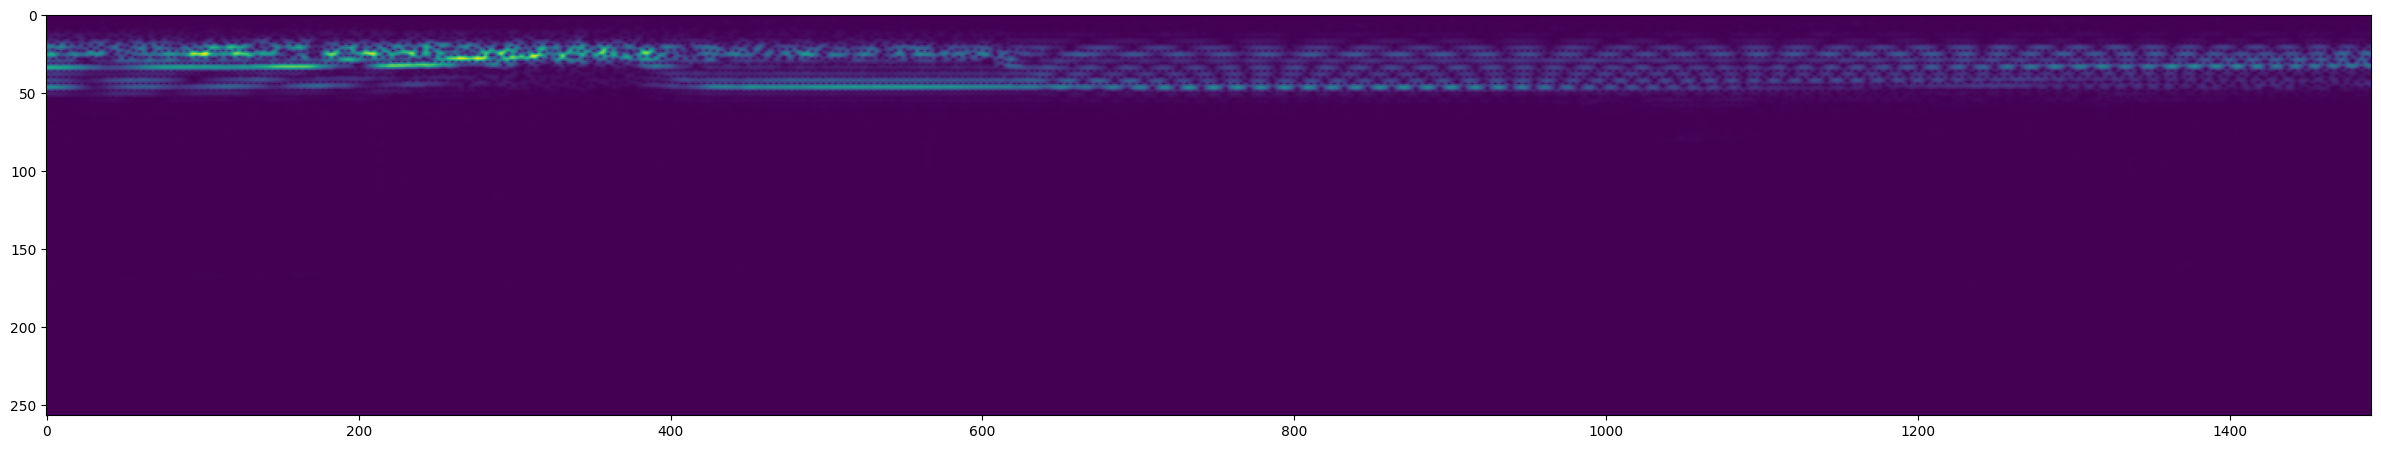

In [48]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

In [49]:
# Negative
file_path, label = negatives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [50]:
spectrogram, label = preprocess(file_path, label)

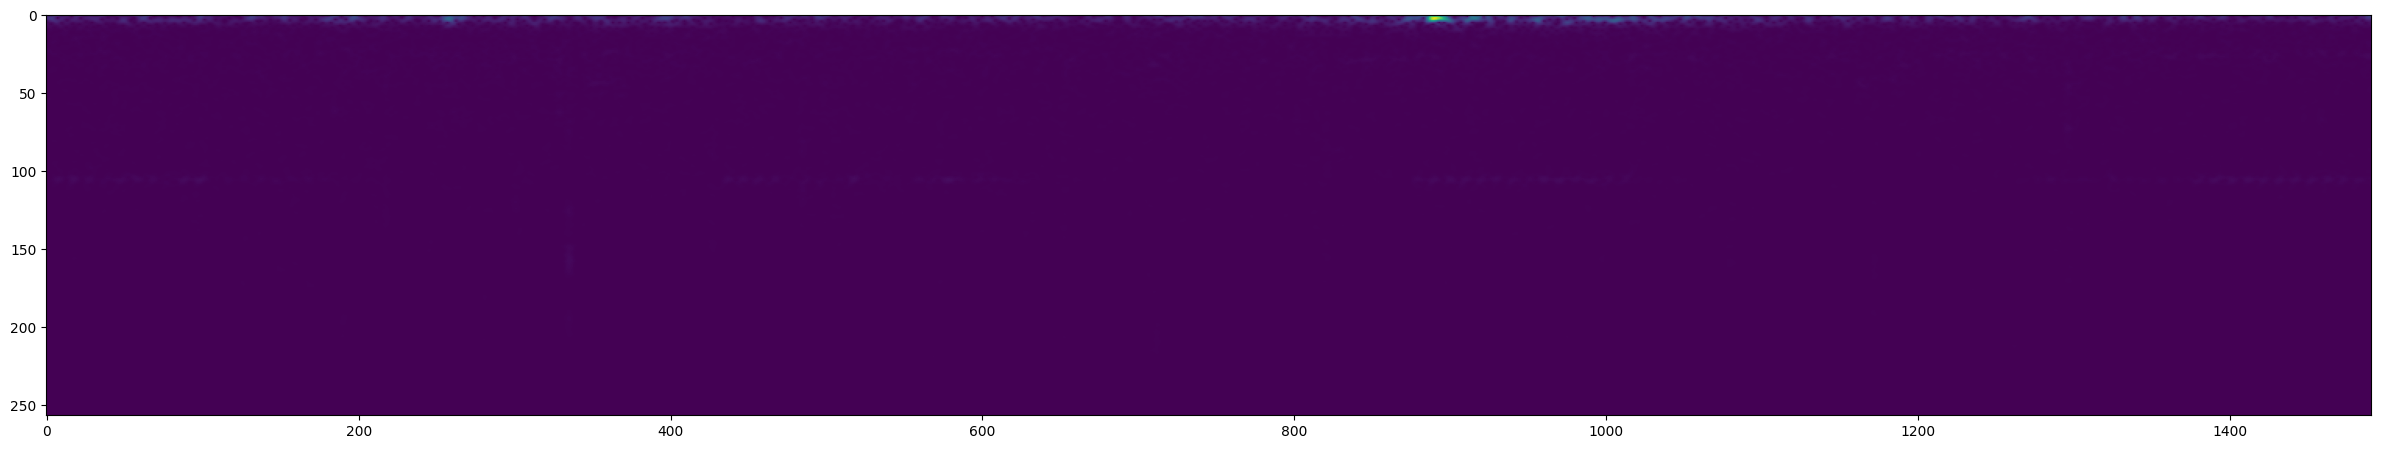

In [51]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# **Create Training And Testing Partitions**

### **Create A Tensorflow Data Pipeline**

In [52]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(8)
data = data.prefetch(8)

### **Split Into Training And Testing Partitions**

In [53]:
print("Length of the dataset", len(data))
print("Length of the training partition", len(data)*.7)

Length of the dataset 102
Length of the training partition 71.39999999999999


In [54]:
train = data.take(36)
test = data.skip(36).take(15)

### **Test One Batch**

In [55]:
samples, labels = train.as_numpy_iterator().next()

In [56]:
samples.shape

(8, 1491, 257, 1)

In [57]:
labels

array([1., 0., 0., 1., 1., 0., 0., 0.], dtype=float32)

# **Build Deep Learning Model**

### **Load Tensorflow Dependencies**

In [58]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Flatten, MaxPooling2D, Dropout

### **Build Sequential Model, Compile And View Summary**

In [59]:
print(type(train))
# Iterate over a batch and get its shape
for batch in train.take(1):
    # Assuming batch is a tuple containing (images, labels)
    for item in batch:
        #print(item.shape) # Print shape of each item in the tuple
        print(len(item))
        #print(type(item))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
8
8


In [60]:
print(type(test))
# Iterate over a batch and get its shape
for batch in test.take(1):
    # Assuming batch is a tuple containing (images, labels)
    for item in batch:
        #print(item.shape) # Print shape of each item in the tuple
        print(len(item))
        #print(type(item))

<class 'tensorflow.python.data.ops.take_op._TakeDataset'>
8
8


In [61]:
# For Train Data
import numpy as np

# Assume 'dataset' is your _TakeDataset object
audio_train_data_list = []
labels__train_list = []

for audio_train_data, train_label in train:
    audio_train_data_list.append(audio_train_data.numpy())  # Convert audio data to NumPy and add to list
    labels__train_list.append(train_label.numpy())  # Convert label to NumPy and add to list

# Convert lists to NumPy arrays
audio_data_train_np = np.array(audio_train_data_list)
labels_train_np = np.array(labels__train_list)

# Check the shapes
print(audio_data_train_np.shape)
print(labels_train_np.shape)

(36, 8, 1491, 257, 1)
(36, 8)


In [62]:
# For Train Data
# Reshape the data from (36, 8, 1491, 257, 1) to (288, 1491, 257, 1)
reshaped_audio_data_train_np = audio_data_train_np.reshape(-1, 1491, 257, 1)
reshaped_labels_train_np = labels_train_np.reshape(-1)

# Check the shapes
print(reshaped_audio_data_train_np.shape)
print(reshaped_labels_train_np.shape)

(288, 1491, 257, 1)
(288,)


In [63]:
# For Test Data
import numpy as np

# Assume 'dataset' is your _TakeDataset object
audio_test_data_list = []
labels__test_list = []

for audio_test_data, test_label in train:
    audio_test_data_list.append(audio_test_data.numpy())  # Convert audio data to NumPy and add to list
    labels__test_list.append(test_label.numpy())  # Convert label to NumPy and add to list

# Convert lists to NumPy arrays
audio_data_test_np = np.array(audio_test_data_list)
labels_test_np = np.array(labels__test_list)

# Check the shapes
print(audio_data_test_np.shape)
print(labels_test_np.shape)

(36, 8, 1491, 257, 1)
(36, 8)


In [64]:
# For Test Data
# Reshape the data from (36, 8, 1491, 257, 1) to (288, 1491, 257, 1)
reshaped_audio_data_test_np = audio_data_test_np.reshape(-1, 1491, 257, 1)
reshaped_labels_test_np = labels_test_np.reshape(-1)

# Check the shapes
print(reshaped_audio_data_test_np.shape)
print(reshaped_labels_test_np.shape)

(288, 1491, 257, 1)
(288,)


In [65]:
# Sequential Model
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation="relu", input_shape=(1491, 257, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="Adam", loss="BinaryCrossentropy", metrics=[tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1489, 255, 16)       │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 744, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 742, 125, 16)        │           2,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 371, 62, 16)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 368032)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      47,108,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,110,833 (179.71 MB)

 Trainable params: 47,110,833 (179.71 MB)

 Non-trainable params: 0 (0.00 B)

### **Fit Model, View Loss And KPI Plot**

In [66]:
# Train the model
history = model.fit(reshaped_audio_data_train_np, reshaped_labels_train_np, epochs=8, validation_data=(reshaped_audio_data_test_np, reshaped_labels_test_np))

Epoch 1/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 126s 14s/step - loss: 6.2707 - precision: 0.4950 - recall: 0.5848 - val_loss: 1.9934 - val_precision: 0.8778 - val_recall: 1.0000
Epoch 2/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 100s 11s/step - loss: 1.1472 - precision: 0.8798 - recall: 0.9156 - val_loss: 1.0567 - val_precision: 0.9268 - val_recall: 0.9620
Epoch 3/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 159s 14s/step - loss: 0.8238 - precision: 0.9508 - recall: 0.9030 - val_loss: 0.7324 - val_precision: 0.9500 - val_recall: 0.9620
Epoch 4/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 144s 13s/step - loss: 0.0684 - precision: 1.0000 - recall: 0.9203 - val_loss: 0.6665 - val_precision: 0.9518 - val_recall: 1.0000
Epoch 5/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 118s 11s/step - loss: 0.0418 - precision: 1.0000 - recall: 0.9640 - val_loss: 0.6545 - val_precision: 0.9518 - val_recall: 1.0000
Epoch 6/8
9/9 ━━━━━━━━━━━━━━━━━━━━ 144s 11s/step - loss: 0.0416 - precision: 0.9833 - recall: 0.9921 - val_loss: 0.6336 - val_precision: 0.9518 - val_recall: 1.0000
Epoch 7/8


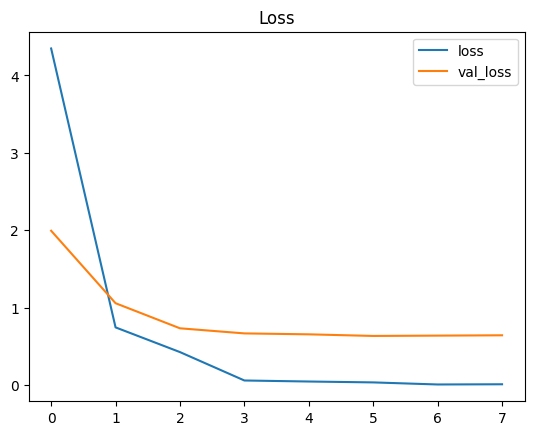

In [67]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title("Loss")
plt.legend()
plt.show()

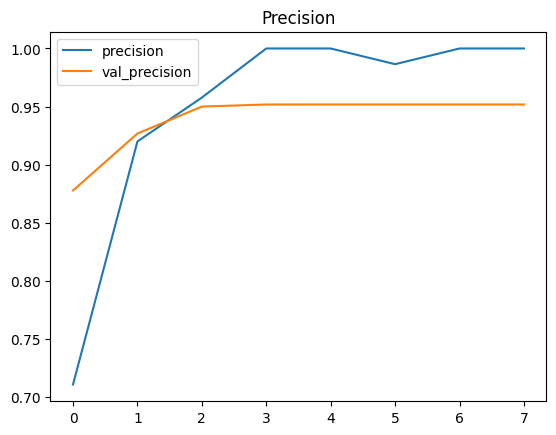

In [68]:
plt.plot(history.history["precision"], label="precision")
plt.plot(history.history["val_precision"], label="val_precision")
plt.title("Precision")
plt.legend()
plt.show()

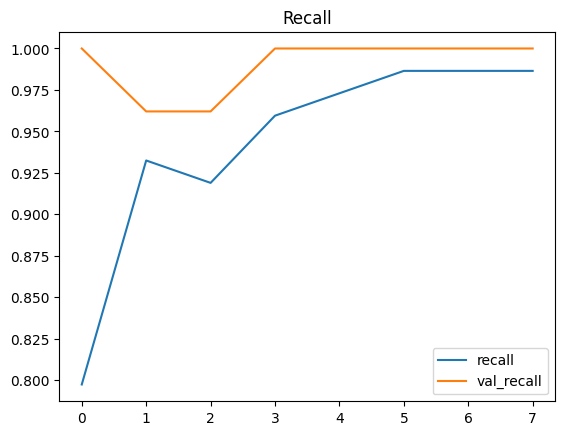

In [69]:
plt.plot(history.history["recall"], label="recall")
plt.plot(history.history["val_recall"], label="val_recall")
plt.title("Recall")
plt.legend()
plt.show()

### **Save The Model**

In [70]:
model.save("capuchin_bird_model.h5")
model.save("capuchin_bird_model.keras")

# **Make Prediction On Single Clip**

### **Get One Batch And Make Prediction**

In [71]:
# Check the shapes
print(reshaped_audio_data_test_np.shape)
print(reshaped_labels_test_np.shape)

(288, 1491, 257, 1)
(288,)


In [72]:
y_pred = model.predict(reshaped_audio_data_test_np)

9/9 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step


In [73]:
y_pred

array([[4.79532719e-06],
       [1.60139601e-03],
       [1.87489732e-10],
       [2.65454320e-22],
       [1.00000000e+00],
       [7.94053747e-08],
       [4.10599818e-11],
       [1.00000000e+00],
       [2.05868510e-05],
       [1.00000000e+00],
       [1.01470206e-15],
       [6.97537454e-31],
       [0.00000000e+00],
       [1.00232080e-17],
       [1.29409370e-19],
       [6.31846753e-09],
       [1.00000000e+00],
       [9.99539137e-01],
       [6.37019845e-03],
       [5.25377482e-23],
       [7.34583102e-03],
       [4.90716891e-17],
       [1.96449523e-08],
       [6.62342210e-25],
       [8.53788606e-07],
       [3.09243936e-10],
       [1.62973243e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.62023914e-01],
       [1.00000000e+00],
       [4.05483006e-04],
       [3.58164182e-23],
       [1.58155430e-03],
       [3.81821337e-07],
       [7.66505025e-07],
       [3.50602157e-16],
       [4.54164171e-26],
       [5.74258277e-24],
       [1.22639364e-07],


### **Convert Logits To Classes**

In [74]:
y_pred = [1 if prediction > 0.5 else 0 for prediction in y_pred]

In [75]:
y_pred

[0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [76]:
tf.math.reduce_sum(y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=83>

In [77]:
tf.math.reduce_sum(reshaped_labels_test_np)

<tf.Tensor: shape=(), dtype=float32, numpy=79.0>

In [78]:
print(y_pred)
print(reshaped_labels_test_np)

[0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1]
[0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1

In [79]:
reshaped_labels_test = reshaped_labels_test_np.tolist()

In [80]:
reshaped_labels_test_int64 = np.array(reshaped_labels_test, dtype=np.int64)
print(reshaped_labels_test_int64)

[0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1]


In [81]:
import pandas as pd

pred_df = pd.DataFrame(y_pred, columns=["Prediction"])
act_df = pd.DataFrame(reshaped_labels_test_int64, columns=["Actual"])

# Concatenate the DataFrames
result_df = pd.concat([pred_df, act_df], axis=1)

# Display the result
result_df

,Prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
...,...,...
283,0,0
284,0,0
285,0,0
286,0,0


In [82]:
result_df["Actual"].value_counts()

,count
Actual,
0,209
1,79


In [83]:
result_df["Prediction"].value_counts()

,count
Prediction,
0,205
1,83


### **Confusion Matrix**

In [84]:
from sklearn.metrics import confusion_matrix

# Assuming y_pred and reshaped_labels_test_np are your predictions and true labels respectively
cm = confusion_matrix(reshaped_labels_test_np, y_pred)
print(cm)

[[205   4]
 [  0  79]]


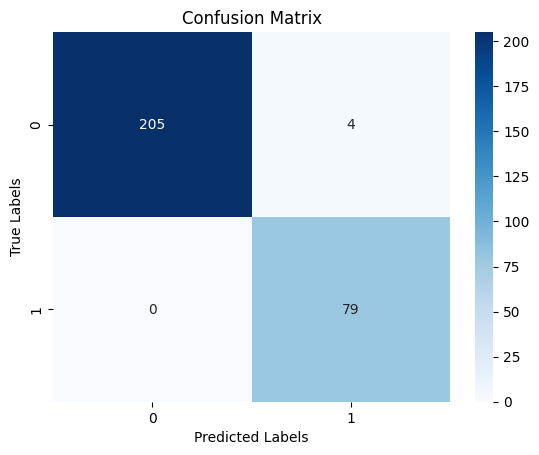

In [85]:
import seaborn as sns

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Build Forest Parsing Function**

### **Load Up MP3s**

In [86]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)	# Load audio
    # Convert to tensor and combine channels
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [116]:
mp3 = os.path.join("data", "Forest Recordings", "recording_00.mp3")
#mp3 = os.path.join("drive", "My Drive", "DL Projects", "CNN Capuchin Audio Classification", "XC526106 - Capuchinbird - Perissocephalus tricolor.mp3")

In [117]:
wav = load_mp3_16k_mono(mp3)
wav

<tf.Tensor: shape=(2880666,), dtype=float32, numpy=
array([ 8.1433272e-12, -5.7019250e-12, -5.3486417e-12, ...,
       -1.1291276e-02, -1.4230422e-02, -3.0555837e-03], dtype=float32)>

In [118]:
# Slice the audio
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
len(audio_slices)

60

In [119]:
samples, index = audio_slices.as_numpy_iterator().next()

In [120]:
samples.shape

(1, 48000)

### **Build Function To Convert Clips Into Windowed Spectrograms**

In [121]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample], 0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

### **Convert Longer Clips Into Windows And Make Predictions**

In [122]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [123]:
y_pred = model.predict(audio_slices)
y_pred = [1 if prediction > 0.99 else 0 for prediction in y_pred]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


### **Group Consecutive Detections**

In [124]:
from itertools import groupby

y_pred = [key for key, group in groupby(y_pred)]

In [125]:
tf.math.reduce_sum(y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [126]:
calls = tf.math.reduce_sum(y_pred).numpy()
print(f"Capuchin Bird Calls: {calls}")

Capuchin Bird Calls: 5


# **Make Predictions**

### **Loop Over All The Recordings And Make Predictions**

In [98]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)

    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)

    y_pred = model.predict(audio_slices)

    results[file] = y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [99]:
results

{'recording_23.mp3': array([[0.97068536],
        [1.        ],
        [0.01793459],
        [0.00141476],
        [0.04122411],
        [0.02271329],
        [0.0043755 ],
        [0.04117149],
        [0.00204468],
        [0.04973466],
        [0.03171289],
        [0.01588365],
        [0.05334161],
        [0.04024253],
        [0.05856745],
        [0.00653894],
        [0.07184634],
        [1.        ],
        [0.10214932],
        [0.02959204],
        [0.02478595],
        [0.0467859 ],
        [0.03695332],
        [0.00782477],
        [0.9995216 ],
        [1.        ],
        [0.00363137],
        [0.00149327],
        [0.00283492],
        [0.00305551],
        [0.0023254 ],
        [0.00248313],
        [0.00381624],
        [0.00241588],
        [0.0062244 ],
        [0.06237606],
        [0.16685387],
        [0.13812914],
        [0.02203679],
        [0.10911156],
        [0.02459667],
        [0.00646599],
        [0.00339498],
        [0.00374218],
        [0.2

### **Convert Predictions Ito Classes**

In [100]:
class_preds= {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

{'recording_23.mp3': [0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_89.mp3': [0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_33.mp3': [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0],
 'recording_18.mp3': [0,
  0,
  0,
  

### **Group Consecutive Detections**

In [101]:
post_processed = {}
for file, scores in class_preds.items():
    post_processed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
post_processed

{'recording_23.mp3': 5,
 'recording_89.mp3': 4,
 'recording_33.mp3': 0,
 'recording_18.mp3': 10,
 'recording_32.mp3': 2,
 'recording_95.mp3': 5,
 'recording_78.mp3': 7,
 'recording_48.mp3': 4,
 'recording_21.mp3': 1,
 'recording_44.mp3': 1,
 'recording_84.mp3': 6,
 'recording_24.mp3': 0,
 'recording_88.mp3': 0,
 'recording_27.mp3': 0,
 'recording_69.mp3': 1,
 'recording_94.mp3': 3,
 'recording_82.mp3': 0,
 'recording_51.mp3': 3,
 'recording_68.mp3': 1,
 'recording_83.mp3': 0,
 'recording_00.mp3': 5,
 'recording_99.mp3': 5,
 'recording_09.mp3': 0,
 'recording_40.mp3': 1,
 'recording_87.mp3': 17,
 'recording_73.mp3': 0,
 'recording_57.mp3': 4,
 'recording_77.mp3': 3,
 'recording_75.mp3': 1,
 'recording_91.mp3': 0,
 'recording_04.mp3': 4,
 'recording_64.mp3': 3,
 'recording_70.mp3': 4,
 'recording_34.mp3': 4,
 'recording_03.mp3': 0,
 'recording_06.mp3': 5,
 'recording_56.mp3': 5,
 'recording_90.mp3': 0,
 'recording_29.mp3': 0,
 'recording_35.mp3': 0,
 'recording_92.mp3': 0,
 'recording_37

# **Export Results**

In [102]:
import csv

with open('capuchinbird_results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in post_processed.items():
        writer.writerow([key, value])

In [103]:
dataset = pd.read_csv("/content/capuchinbird_results.csv")
dataset.head()

,recording,capuchin_calls
0,recording_23.mp3,5
1,recording_89.mp3,4
2,recording_33.mp3,0
3,recording_18.mp3,10
4,recording_32.mp3,2


In [104]:
import re

# Iterate over the rows of the DataFrame
for index, row in dataset.iterrows():
    if row["capuchin_calls"] >= 10:
        # Use regular expression to extract numbers from the recording string
        match = re.search(r'\d+', row['recording'])
        if match:
            print(f"High density Capuchin detected area no: {match.group()} \tRecording no: {row['recording']}")

High density Capuchin detected area no: 18 	Recording no: recording_18.mp3
High density Capuchin detected area no: 87 	Recording no: recording_87.mp3
High density Capuchin detected area no: 08 	Recording no: recording_08.mp3
High density Capuchin detected area no: 98 	Recording no: recording_98.mp3
High density Capuchin detected area no: 28 	Recording no: recording_28.mp3
